## Introdução 
Curso focado na análise exploratória de dados, utilizando a linguagem Python e  biblioteca Seaborn

In [1]:
import pandas as pd

In [28]:
df = pd.read_csv('tips.csv')

In [3]:
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
linhas, colunas = df.shape

In [6]:
linhas

244

In [7]:
colunas 

6

## Renomeando

In [8]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [29]:
df.rename(columns={'total_bill': 'valor_da_conta', 'tip' : 'gorjeta',
                   'dessert': 'sobremesa', 'day': 'dia', 'time': 'periodo', 'size' :'pessoas'}, inplace=True)

In [13]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [14]:
df.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df['sobremesa'] = df.sobremesa.map({
    'Yes': 'Sim',
    'No' : 'Nao'
})

In [22]:
df.periodo.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [31]:
df.periodo = df['periodo'] = df.periodo.map({
    'Dinner': 'Jantar',
    'Lunch' : 'Almoco'
})

In [26]:
df.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [32]:
df.dia = df.dia.map({
    'Sun': 'Domingo',
    'Sat' : 'Sabado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
    
})

In [33]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2
4,24.59,3.61,Nao,Domingo,Jantar,4


## Gráficos

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df.count()

valor_da_conta    244
gorjeta           244
sobremesa         244
dia               244
periodo           244
pessoas           244
dtype: int64

In [47]:
df.isnull().sum()

valor_da_conta    0
gorjeta           0
sobremesa         0
dia               0
periodo           0
pessoas           0
dtype: int64

In [37]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2
4,24.59,3.61,Nao,Domingo,Jantar,4


#### 1 - Quanto maior a conta, maior a gorjeta?

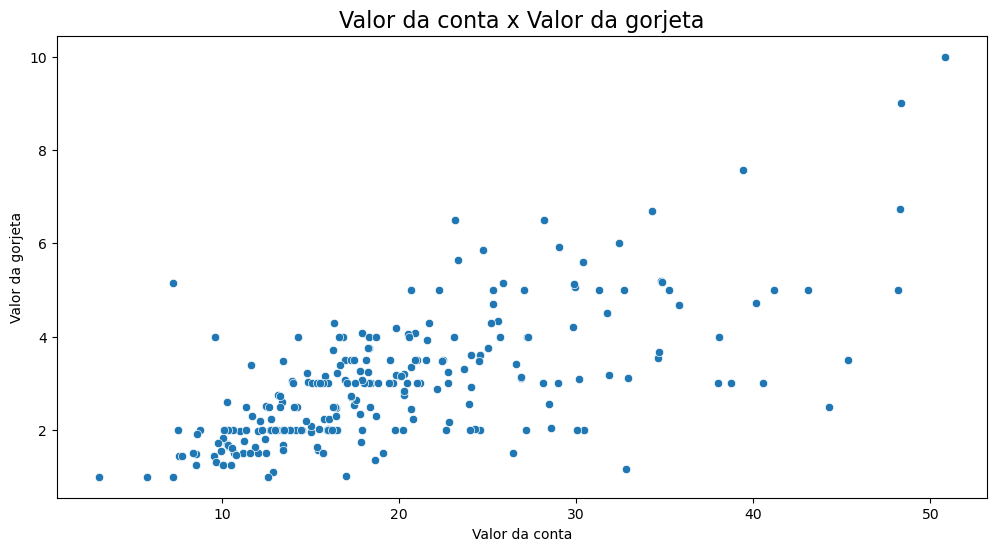

In [45]:
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(data= df, x= 'valor_da_conta', y= 'gorjeta')
ax.set_xlabel("Valor da conta")
ax.set_ylabel("Valor da gorjeta")
ax.set_title('Valor da conta x Valor da gorjeta', fontsize = 16)
plt.show()

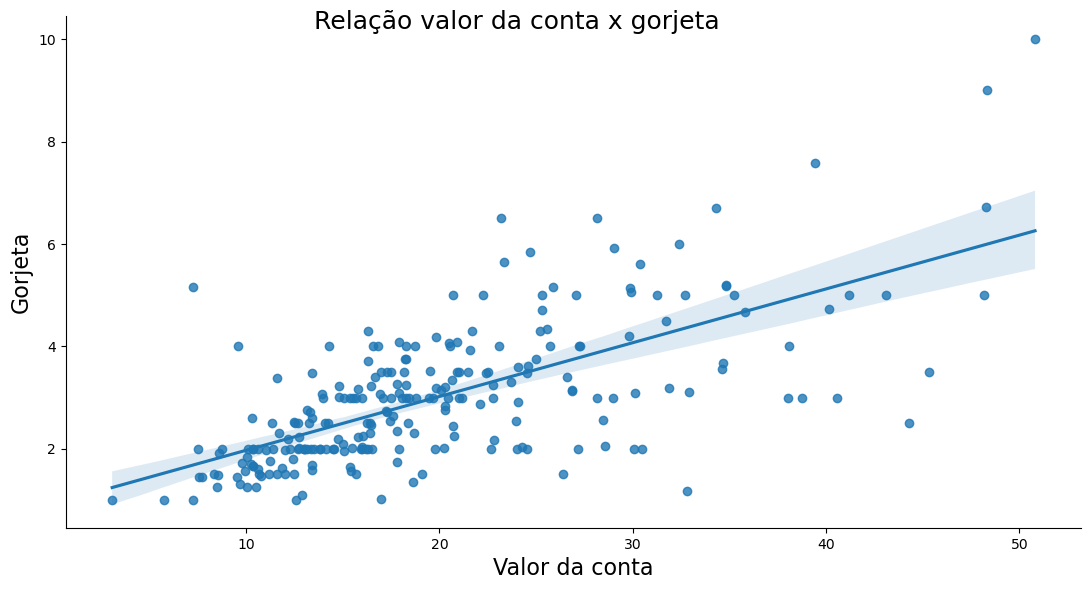

In [78]:
ax = sns.lmplot(data = df, x = 'valor_da_conta', y ='gorjeta')
ax.figure.set_size_inches(12, 6)
ax.figure.suptitle("Relação valor da conta x gorjeta", fontsize = 18)
ax.set_ylabels('Gorjeta', fontsize = 16)
ax.set_xlabels('Valor da conta', fontsize = 16)

plt.show()

- Visualmente, há uma reta linear. Ou seja, quanto maior o valor da conta, maior a gorjeta.
---

### Campo porcentagem

In [60]:
df['porcentagem'] = ((df['gorjeta'] / df['valor_da_conta'])*100).round(0)
df.head()

,valor_da_conta,gorjeta,sobremesa,dia,periodo,pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,6.0
1,10.34,1.66,Nao,Domingo,Jantar,3,16.0
2,21.01,3.50,Nao,Domingo,Jantar,3,17.0
3,23.68,3.31,Nao,Domingo,Jantar,2,14.0
4,24.59,3.61,Nao,Domingo,Jantar,4,15.0


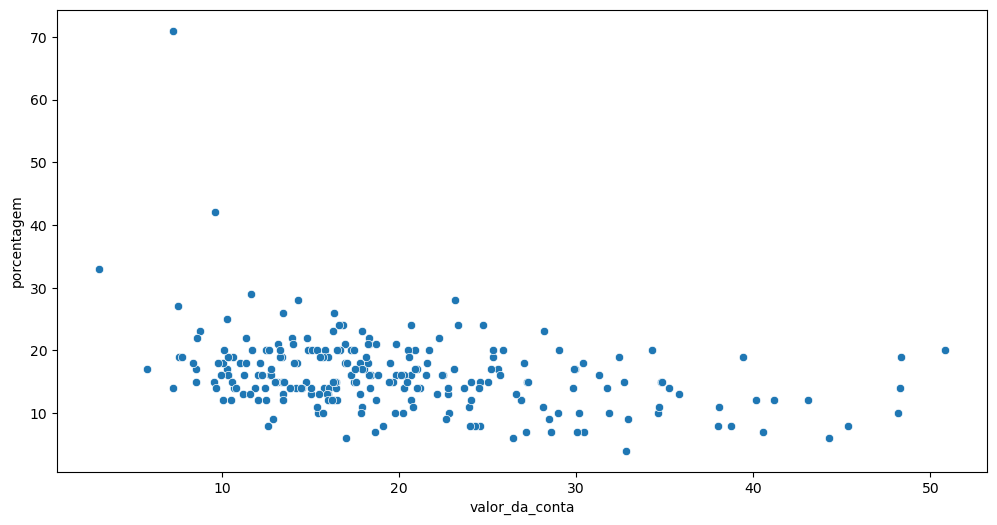

In [63]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data= df, x = 'valor_da_conta', y= 'porcentagem')

plt.show()


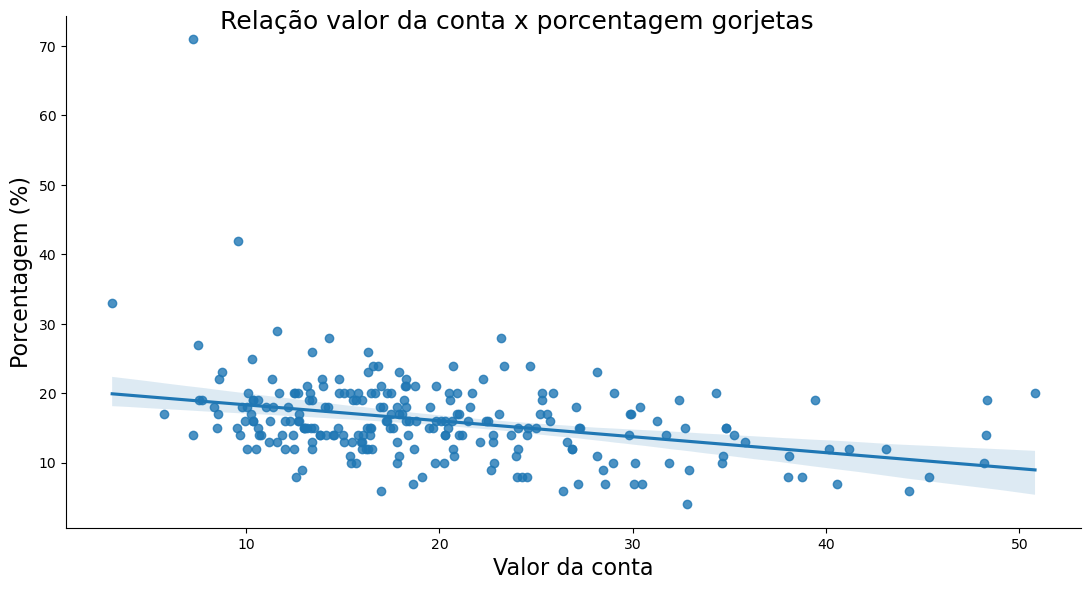

In [74]:
ax= sns.lmplot(data= df, x = 'valor_da_conta', y ='porcentagem')
ax.figure.set_size_inches(12, 6)
ax.set_ylabels('Porcentagem (%)', fontsize = 16)
ax.set_xlabels("Valor da conta", fontsize = 16)
ax.fig.suptitle("Relação valor da conta x porcentagem gorjetas", fontsize = 18)
plt.show()

- Analisando a reta, observe uma tendência negativa. Ou seja, quanto maior o valor da conta, menor a porcentagem da gorjeta.
---


### Relplot
Doc: https://seaborn.pydata.org/generated/seaborn.relplot.html

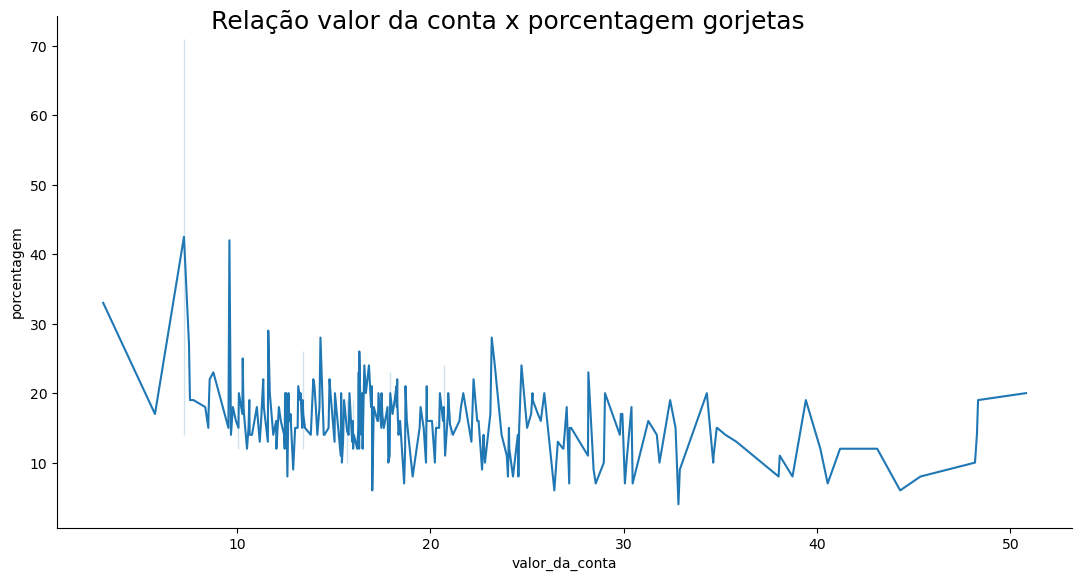

In [83]:
ax = sns.relplot(data = df, x ='valor_da_conta', y = 'porcentagem', kind= 'line')
ax.fig.suptitle("Relação valor da conta x porcentagem gorjetas", fontsize = 18)
ax.figure.set_size_inches(12, 6)
plt.show()